# Massachusetts Education Data
    By: Andrew Ellis

In [6]:
!pip install -U pandasql;
!pip install --upgrade pip

Requirement already up-to-date: pandasql in /opt/conda/lib/python3.6/site-packages
Requirement already up-to-date: numpy in /opt/conda/lib/python3.6/site-packages (from pandasql)
Requirement already up-to-date: sqlalchemy in /opt/conda/lib/python3.6/site-packages (from pandasql)
Requirement already up-to-date: pandas in /opt/conda/lib/python3.6/site-packages (from pandasql)
Requirement already up-to-date: python-dateutil>=2 in /opt/conda/lib/python3.6/site-packages (from pandas->pandasql)
Requirement already up-to-date: pytz>=2011k in /opt/conda/lib/python3.6/site-packages (from pandas->pandasql)
Requirement already up-to-date: six>=1.5 in /opt/conda/lib/python3.6/site-packages (from python-dateutil>=2->pandas->pandasql)
Requirement already up-to-date: pip in /opt/conda/lib/python3.6/site-packages


In [7]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, LassoCV, LinearRegression, Ridge, RidgeCV
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.cluster import DBSCAN
from pandasql import sqldf

from matplotlib import cm
from collections import OrderedDict

cmaps = OrderedDict()

%matplotlib inline

# Notes for capstone:

    - I should use a clustering model at some point. 
    - I am going to use bagging as well.
    - Do I want to do classification? try something like (train['Percent_Change]>0).astype(int)
    -Do I want to compare District PPI with School PPI? If positive, that is good.

# EDA Section:
    - Dropping columns.
    - Merging necessary data.
    - Selecting the target variable (It is actually pretty hard).

In [8]:
pd.set_option('display.max_columns', 999)
pd.set_option('display.max_rows', 999)

In [9]:
df= pd.read_csv('MA_Public_Schools_2017.csv')
df.shape

(1861, 302)

In [10]:
df.head()

School Code                     School Name    School Type   Function  \
0        10505                   Abington High  Public School  Principal   
1        10003  Beaver Brook Elementary School  Public School  Principal   
2        10002        Center Elementary School  Public School  Principal   
3        10405            Frolio Middle School  Public School  Principal   
4        10015     Woodsdale Elementary School  Public School  Principal   

           Contact Name            Address 1 Address 2      Town State   Zip  \
0  Teresa Sullivan-Cruz   201 Gliniewicz Way       NaN  Abington    MA  2351   
1       Catherine Zinni  1 Ralph Hamlin Lane       NaN  Abington    MA  2351   
2        Lora Monachino   201 Gliniewicz Way       NaN  Abington    MA  2351   
3    Matthew MacCurtain   201 Gliniewicz Way       NaN  Abington    MA  2351   
4        Jonathan Hawes  128 Chestnut Street       NaN  Abington    MA  2351   

          Phone           Fax        Grade District Name  District Code  \
0  781-982-2160  781-982-0061  09,10,11,12      Abington          10000   
1  781-982-2185  781-982-2187  01,02,03,04      Abington          10000   
2  781-982-2195  781-982-0053         PK,K      Abington          10000   
3  781-982-2170  781-982-2173        07,08      Abington          10000   
4  781-982-2180  781-982-2184        05,06      Abington          10000   

   PK_Enrollment  K_Enrollment  1_Enrollment  2_Enrollment  3_Enrollment  \
0              0             0             0             0             0   
1              0             0           125           164           148   
2             69           134             0             0             0   
3              0             0             0             0             0   
4              0             0             0             0             0   

   4_Enrollment  5_Enrollment  6_Enrollment  7_Enrollment  8_Enrollment  \
0             0             0             0             0             0   
1           143             0             0             0             0   
2             0             0             0             0             0   
3             0             0             0           159           169   
4             0           180           173             0             0   

   9_Enrollment  10_Enrollment  11_Enrollment  12_Enrollment  SP_Enrollment  \
0           124            109            123             92              4   
1             0              0              0              0              0   
2             0              0              0              0              0   
3             0              0              0              0              0   
4             0              0              0              0              0   

   TOTAL_Enrollment  First Language Not English  % First Language Not English  \
0               452                        24.0                           5.3   
1               580                        61.0                          10.5   
2               203                        26.0                          12.8   
3               328                        18.0                           5.5   
4               353                        21.0                           5.9   

   English Language Learner  % English Language Learner  \
0                      11.0                         2.4   
1                      42.0                         7.2   
2                       6.0                         3.0   
3                       6.0                         1.8   
4                       7.0                         2.0   

   Students With Disabilities  % Students With Disabilities  High Needs  \
0                        44.0                           9.7       130.0   
1                        77.0                          13.3       215.0   
2                        43.0                          21.2        69.0   
3                        43.0                          13.1       101.0   
4             

In [11]:
df_nulls = df.isnull().sum()
df_nulls = df_nulls.sort_values(ascending=False)
df_nulls
#Given the amount of nulls in a lot of these columns, I am going to 
#drop any that are over 80% null.

MCAS_3rdGrade_English_SGP                                              1861
MCAS_3rdGrade_Math_SGP                                                 1861
MCAS_3rdGrade_Math_Incl. in SGP(#)                                     1861
MCAS_3rdGrade_English_Incl. in SGP(#)                                  1861
Address 2                                                              1831
MCAS_8thGrade_English_SGP                                              1734
MCAS_8thGrade_Math_SGP                                                 1734
MCAS_7thGrade_Math_SGP                                                 1733
MCAS_7thGrade_English_SGP                                              1733
% MCAS_7thGrade_English_W/F                                            1732
% MCAS_7thGrade_English_P+A                                            1732
MCAS_7thGrade_English_Stud. Incl. #                                    1732
MCAS_7thGrade_English_W/F #                                            1732
% MCAS_7thGr

In [12]:
#I am going to drop the 4 columns that are all nulls (see top of df_nulls)

df = df.drop(['MCAS_3rdGrade_English_SGP', 'MCAS_3rdGrade_Math_SGP', 
              'MCAS_3rdGrade_Math_Incl. in SGP(#)', 'MCAS_3rdGrade_English_Incl. in SGP(#)', 
              'Function', 'Contact Name', 'Fax', 'Phone', 'Address 2', 'Address 1'], axis = 1)

In [13]:
df.shape

(1861, 292)

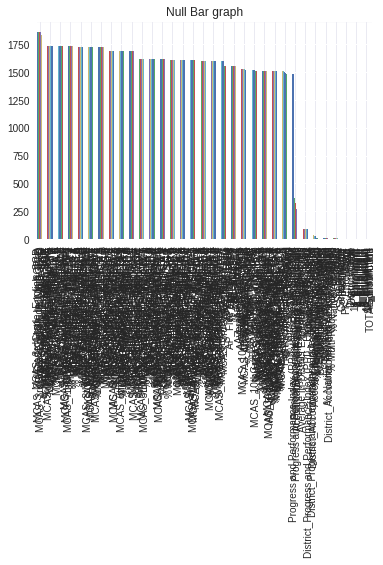

In [14]:
df_nulls.plot(kind='bar', title='Null Bar graph')

In [15]:
df.shape

(1861, 292)

/opt/conda/lib/python3.6/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


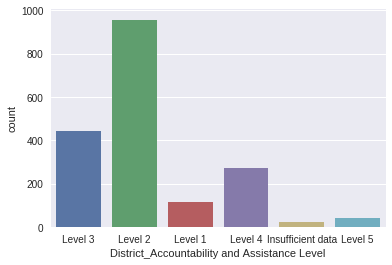

In [47]:
sns.countplot(x=df['District_Accountability and Assistance Level'])

In [16]:
df.head(3)

School Code                     School Name    School Type      Town State  \
0        10505                   Abington High  Public School  Abington    MA   
1        10003  Beaver Brook Elementary School  Public School  Abington    MA   
2        10002        Center Elementary School  Public School  Abington    MA   

    Zip        Grade District Name  District Code  PK_Enrollment  \
0  2351  09,10,11,12      Abington          10000              0   
1  2351  01,02,03,04      Abington          10000              0   
2  2351         PK,K      Abington          10000             69   

   K_Enrollment  1_Enrollment  2_Enrollment  3_Enrollment  4_Enrollment  \
0             0             0             0             0             0   
1             0           125           164           148           143   
2           134             0             0             0             0   

   5_Enrollment  6_Enrollment  7_Enrollment  8_Enrollment  9_Enrollment  \
0             0             0             0             0           124   
1             0             0             0             0             0   
2             0             0             0             0             0   

   10_Enrollment  11_Enrollment  12_Enrollment  SP_Enrollment  \
0            109            123             92              4   
1              0              0              0              0   
2              0              0              0              0   

   TOTAL_Enrollment  First Language Not English  % First Language Not English  \
0               452                        24.0                           5.3   
1               580                        61.0                          10.5   
2               203                        26.0                          12.8   

   English Language Learner  % English Language Learner  \
0                      11.0                         2.4   
1                      42.0                         7.2   
2                       6.0                         3.0   

   Students With Disabilities  % Students With Disabilities  High Needs  \
0                        44.0                           9.7       130.0   
1                        77.0                          13.3       215.0   
2                        43.0                          21.2        69.0   

   % High Needs  Economically Disadvantaged  % Economically Disadvantaged  \
0          28.8                        97.0                          21.5   
1          37.1                       135.0                          23.3   
2          34.0                        33.0                          16.3   

   % African American  % Asian  % Hispanic  % White  % Native American  \
0                 2.2      1.5         9.1     85.8                0.2   
1                 1.9      1.9         6.7     88.4                0.5   
2                 3.9      3.0         8.4     84.7                0.0   

   % Native Hawaiian, Pacific Islander  % Multi-Race, Non-Hispanic  % Males  \
0                                  0.2                         0.9     45.6   
1                                  0.2                         0.3     50.2   
2                                  0.0                         0.0     54.2   

   % Females  Total # of Classes  Average Class Size  Number of Students  \
0       54.4               204.0                15.8               451.0   
1       49.8               325.0                24.6               643.0   
2       45.8               112.0                14.6               208.0   

   Salary Totals  Average Salary  FTE Count  In-District Expenditures  \
0      9489496.0         74662.0      127.0               23365711.18   
1      9489496.0         74662.0      127.0               23365711.18   
2      9489496.0         74662.0      127.0               23365711.18   

   Total In-district FTEs  Average In-District Expenditures per Pupil  \
0                  1939.0                                    12050.39   
1           

In [17]:
df['State'].nunique()

1

In [18]:
df.drop(['State'], axis = 1, inplace=True)
df.shape

(1861, 291)

Now I want to see if I need to drop any rows

In [19]:
transposed = df.set_index('School Code').T
transposed.head()
transposed.isnull().sum();
#Do I want to drop rows though??

How can we fill certain nulls?

In [20]:
df.select_dtypes(include=object)
#I see that 'Accountability and Assistance description are both here... I might drop the 'description'
#column because I want to make the objects more measurable.
#Accountability levels indicate whether a school is meeting their 'close the gap' expectations
#What does it take to

School Name     School Type  \
0                                         Abington High   Public School   
1                        Beaver Brook Elementary School   Public School   
2                              Center Elementary School   Public School   
3                                  Frolio Middle School   Public School   
4                           Woodsdale Elementary School   Public School   
5                            Acushnet Elementary School   Public School   
6                           Albert F Ford Middle School   Public School   
7                         Agawam Early Childhood Center   Public School   
8                                           Agawam High   Public School   
9                                    Agawam Junior High   Public School   
10                                    Benjamin J Phelps   Public School   
11                                   Clifford M Granger   Public School   
12                                   James Clark School   Public School   
13                            Roberta G. Doering School   Public School   
14                                        Robinson Park   Public School   
15                                  Amesbury Elementary   Public School   
16                                        Amesbury High   Public School   
17                      Amesbury Innovation High School   Public School   
18                                      Amesbury Middle   Public School   
19                         Charles C Cashman Elementary   Public School   
20                              Crocker Farm Elementary   Public School   
21                                Fort River Elementary   Public School   
22                                  Wildwood Elementary   Public School   
23                                         Andover High   Public School   
24                                  Andover West Middle   Public School   
25                                  Bancroft Elementary   Public School   
26                                       Doherty Middle   Public School   
27                           Henry C Sanborn Elementary   Public School   
28                                High Plain Elementary   Public School   
29                                     Shawsheen School   Public School   
30                                     South Elementary   Public School   
31                                      West Elementary   Public School   
32                              Wood Hill Middle School   Public School   
33                                       Arlington High   Public School   
34                                             Brackett   Public School   
35                                       Cyrus E Dallin   Public School   
36                                                Hardy   Public School   
37                                        John A Bishop   Public School   
38                                  M Norcross Stratton   Public School   
39                                   Menotomy Preschool   Public School   
40                                       Ottoson Middle   Public School   
41                                               Peirce   Public School   
42                                             Thompson   Public School   
43                                         Ashland High   Public School   
44                                       Ashland Middle   Public School   
45                                        David Mindess   Public School   
46                            Henry E Warren Elementary   Public School   
47                          William Pittaway Elementary   Public School   
48                   A. Irvin Studley Elementary School   Public School   
49                          Attleboro Community Academy   Public School   
50                                       Attleboro High   Public School   
51                       Cyril K. Brennan Middle School   Public School   
52                                Early Learning Center   Public Scho

In [21]:
#df.drop('Accountability and Assistance Description', axis=1, inplace = True)
#Takes care of one object column...
df['AP_Test Takers'].fillna(value=0, inplace=True)

In [22]:
df['AP_Tests Taken'].fillna(value=0, inplace=True)
df['AP_Tests Taken'].dtype

dtype('O')

# Creating High School, Middle School, and Elementary School df's:

In [23]:
df_high=df.loc[(df['10_Enrollment'] != 0)]
df_high.shape

(395, 291)

In [24]:
df_middle=df.loc[(df['7_Enrollment'] !=0) & (df['2_Enrollment'] ==0)]
df_middle.shape

(373, 291)

In [25]:
df_k8 = df.loc[(df['K_Enrollment'] !=0) & (df['8_Enrollment'] !=0)]
df_k8.shape

(117, 291)

In [26]:
df_elem = df.loc[(df['2_Enrollment'] !=0)]
df_elem.shape

(983, 291)

# df_elem workspace:

### Cleaning:

In [27]:
df_elem.head(10)

School Code                     School Name    School Type           Town  \
1         10003  Beaver Brook Elementary School  Public School       Abington   
5         30025      Acushnet Elementary School  Public School       Acushnet   
10        50020               Benjamin J Phelps  Public School         Agawam   
11        50010              Clifford M Granger  Public School  Feeding Hills   
12        50030              James Clark School  Public School         Agawam   
14        50025                   Robinson Park  Public School         Agawam   
15        70005             Amesbury Elementary  Public School       Amesbury   
19        70010    Charles C Cashman Elementary  Public School       Amesbury   
20        80009         Crocker Farm Elementary  Public School        Amherst   
21        80020           Fort River Elementary  Public School        Amherst   

     Zip                   Grade District Name  District Code  PK_Enrollment  \
1   2351             01,02,03,04      Abington          10000              0   
5   2743        PK,K,01,02,03,04      Acushnet          30000             50   
10  1001           K,01,02,03,04        Agawam          50000              0   
11  1030           K,01,02,03,04        Agawam          50000              0   
12  1001           K,01,02,03,04        Agawam          50000              0   
14  1001           K,01,02,03,04        Agawam          50000              0   
15  1913        PK,K,01,02,03,04      Amesbury          70000             26   
19  1913        PK,K,01,02,03,04      Amesbury          70000             25   
20  1002  PK,K,01,02,03,04,05,06       Amherst          80000             66   
21  1002     K,01,02,03,04,05,06       Amherst          80000              0   

    K_Enrollment  1_Enrollment  2_Enrollment  3_Enrollment  4_Enrollment  \
1              0           125           164           148           143   
5             84            99           102           107            96   
10            91            62            72            86            74   
11            60            43            66            64            60   
12            67            67            61            74            60   
14            78            79            61            78            81   
15            56            72            85            77            72   
19            71            86            89            93            94   
20            34            43            50            58            44   
21            42            41            42            42            65   

    5_Enrollment  6_Enrollment  7_Enrollment  8_Enrollment  9_Enrollment  \
1              0             0             0             0             0   
5              0             0             0             0             0   
10             0             0             0             0             0   
11             0             0             0             0             0   
12             0             0             0             0             0   
14             0             0             0             0             0   
15             0             0             0             0             0   
19             0             0             0             0             0   
20            60            49             0             0             0   
21            59            44             0             0             0   

    10_Enrollment  11_Enrollment  12_Enrollment  SP_Enrollment  \
1               0              0              0              0   
5               0              0              0              0   
10              0              0              0              0   
11              0              0              0              0   
12              0              0              0              0   
14              0              0              0              0   
15              0              0              0              0   
19              0            

In [28]:
df_elem.shape

(983, 291)

In [29]:
school_type_dummies_elem = pd.get_dummies(df_elem['School Type'])
df_elem = pd.concat([df_elem, school_type_dummies_elem], axis=1)
df_elem.shape

(983, 293)

In [30]:
school_type_dummies_elem.head()

Charter School  Public School
1                0              1
5                0              1
10               0              1
11               0              1
12               0              1

In [31]:
#Here I am investigating what columns I need to drop. 
#There are quite a few that need to be dropped since not every school has the same tests.
#df_elem['Progress and Performance Index (PPI) - All Students'].isnull().sum()
#df_elem.dropna(thresh=100, axis=0, inplace=True)
#df_elem.shape
#df_elem.columns
#df_elem['Progress and Performance Index (PPI) - All Students'].fillna((df_elem['Progress and Performance Index (PPI) - All Students'].mean()), inplace=True)
#I decided to fill my target variable with the mean of the column
df_elem['Progress and Performance Index (PPI) - All Students'].fillna((df_elem['Progress and Performance Index (PPI) - All Students'].mean()), inplace=True)
df_elem['Progress and Performance Index (PPI) - All Students'].isnull().sum()


0

### Dropping columns with descriptive values and lots of missing information:

In [32]:
df_elem.drop(['Accountability and Assistance Level', 'Accountability and Assistance Description', 
              'District_Accountability and Assistance Description', 
              'District_Accountability and Assistance Level', 'AP_Test Takers',
             'AP_Tests Taken', 'Progress and Performance Index (PPI) - High Needs Students', 
             'District_Progress and Performance Index (PPI) - All Students', 
             'District_Progress and Performance Index (PPI) - High Needs Students'], axis=1, inplace=True)

In [33]:
#Dropping enrollment columns:
df_elem.drop(['7_Enrollment', '8_Enrollment', '9_Enrollment', '10_Enrollment', '11_Enrollment', '12_Enrollment'], axis=1, inplace=True)

In [34]:
df_elem.dropna(thresh=300, axis=1, inplace=True)

In [35]:
df_elem.isnull().sum()

School Code                                              0
School Name                                              0
School Type                                              0
Town                                                     0
Zip                                                      0
Grade                                                    0
District Name                                            0
District Code                                            0
PK_Enrollment                                            0
K_Enrollment                                             0
1_Enrollment                                             0
2_Enrollment                                             0
3_Enrollment                                             0
4_Enrollment                                             0
5_Enrollment                                             0
6_Enrollment                                             0
SP_Enrollment                                           

### Imputing column values:

In [36]:
df_elem['School Accountability Percentile (1-99)'].fillna((df_elem['School Accountability Percentile (1-99)'].mean()), inplace=True)
#df_elem['Progress and Performance Index (PPI) - High Needs Students'].fillna((df_elem['Progress and Performance Index (PPI) - High Needs Students'].mean()), inplace=True)
#df_elem['District_Progress and Performance Index (PPI) - All Students'].fillna((df_elem['District_Progress and Performance Index (PPI) - All Students'].mean()), inplace=True)
#df_elem['District_Progress and Performance Index (PPI) - High Needs Students'].fillna((df_elem['District_Progress and Performance Index (PPI) - High Needs Students'].mean()), inplace=True)
   

In [37]:
def common_nulls_elem(df):
    for col in df.columns:
        if df[col].isnull().sum() == 42:
            df[col].fillna((df[col].mean()), inplace=True)
        elif df[col].isnull().sum() == 4:
            df[col].fillna((df[col].mean()), inplace=True)
    return df

In [38]:
#df_elem['Charter School'].convert_objects(convert_numeric=True).dtypes

In [39]:
common_nulls_elem(df_elem)

School Code                                        School Name  \
1           10003                     Beaver Brook Elementary School   
5           30025                         Acushnet Elementary School   
10          50020                                  Benjamin J Phelps   
11          50010                                 Clifford M Granger   
12          50030                                 James Clark School   
14          50025                                      Robinson Park   
15          70005                                Amesbury Elementary   
19          70010                       Charles C Cashman Elementary   
20          80009                            Crocker Farm Elementary   
21          80020                              Fort River Elementary   
22          80050                                Wildwood Elementary   
25          90003                                Bancroft Elementary   
27          90010                         Henry C Sanborn Elementary   
28          90004                              High Plain Elementary   
30          90020                                   South Elementary   
31          90025                                    West Elementary   
34         100010                                           Brackett   
35         100025                                     Cyrus E Dallin   
36         100030                                              Hardy   
37         100005                                      John A Bishop   
38         100055                                M Norcross Stratton   
41         100045                                             Peirce   
42         100050                                           Thompson   
46         140010                          Henry E Warren Elementary   
48         160001                 A. Irvin Studley Elementary School   
53         160045                     Hill-Roberts Elementary School   
54         160040                       Hyman Fine Elementary School   
55         160050                    Peter Thacher Elementary School   
57         160035                   Thomas Willett Elementary School   
61         170010                                          Bryn Mawr   
62         170025                                   Pakachoag School   
65         180010                                     Ralph D Butler   
69         200010                             Centerville Elementary   
71         200025                            Hyannis West Elementary   
72         200005                         West Barnstable Elementary   
73         200045                    West Villages Elementary School   
76         230010                                    Lt Elezer Davis   
82         240018                             Swift River Elementary   
87         250020                                   South Elementary   
88         250025                                        Stall Brook   
90         260015                                      Daniel Butler   
91         260010                                   Mary Lee Burbank   
92         260035                                 Roger E Wellington   
93         260005                                         Winn Brook   
95         270010                           Berkley Community School   
97         280005                                    Berlin Memorial   
98         300055                             Ayers/Ryal Side School   
101        300010                             Centerville Elementary   
102        300015                                    Cove Elementary   
103        300033                                  Hannah Elementary   
105        300040                           North Beverly Elementary   
107        310030                                    Eugene C Vining   
108        310007                                 Frederick J Dutile   
109        310026                                  Hajjar Elementary   
110        310012                             

In [40]:
df_elem.shape

(983, 53)

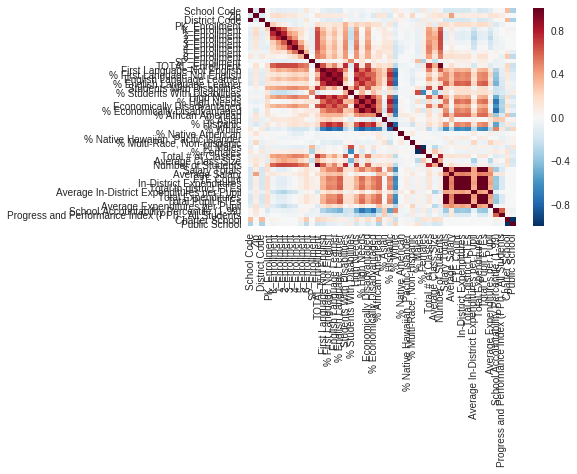

In [41]:
#Now my elementary dataset is clean
sns.heatmap(df_elem.corr());

### Model experimentation:

In [42]:
features = df_elem.drop(['Progress and Performance Index (PPI) - All Students', 'School Name', 'Town', 'Grade', 'District Name', 'School Type'], axis=1)

X = features
y = df_elem['Progress and Performance Index (PPI) - All Students']
ss = StandardScaler()
X_s = ss.fit_transform(X)

In [43]:
features.dtypes

School Code                                     int64
Zip                                             int64
District Code                                   int64
PK_Enrollment                                   int64
K_Enrollment                                    int64
1_Enrollment                                    int64
2_Enrollment                                    int64
3_Enrollment                                    int64
4_Enrollment                                    int64
5_Enrollment                                    int64
6_Enrollment                                    int64
SP_Enrollment                                   int64
TOTAL_Enrollment                                int64
First Language Not English                    float64
% First Language Not English                  float64
English Language Learner                      float64
% English Language Learner                    float64
Students With Disabilities                    float64
% Students With Disabilities

In [44]:
optimal_lasso = LassoCV(n_alphas=500, cv=10, verbose=1)
optimal_lasso.fit(X_s, y)

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

LassoCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=500, n_jobs=1, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=1)

In [45]:
lasso=Lasso(alpha=optimal_lasso.alpha_)

lasso_scores = cross_val_score(lasso, X_s, y, cv=10)

print(lasso_scores)
print(np.mean(lasso_scores))

[0.28179409 0.4207649  0.42908653 0.47146693 0.41529494 0.46840867
 0.25566496 0.47241802 0.42170872 0.40586693]
0.4042474706997325


In [46]:
Lasso_coefs = pd.DataFrame({
        'coef':optimal_lasso.coef_,
        'variable':df_elem.columns,
        
    })
Lasso_coefs.sort_values('coef', ascending=False, inplace=True)
Lasso_coefs.head(20)

ValueError: arrays must all be same length

In [48]:
print(optimal_lasso.coef_)
Lasso_Coefs = pd.DataFrame({'Coefs':optimal_lasso.coef_, 'features': features.columns})
Lasso_Coefs

[ 3.81560484e-01  0.00000000e+00  4.52732222e-04  8.87334418e-02
  1.56592259e-01  3.57242915e-02  4.25416104e-01  1.40473996e-02
 -1.37213875e-01 -0.00000000e+00 -1.49016487e+00 -8.20707892e-02
  0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -9.59817832e-01 -2.60043451e-01  0.00000000e+00
  0.00000000e+00  1.50369389e-01  1.00191475e+00 -0.00000000e+00
  1.78906442e-01  1.30979696e-01 -3.53094851e+00 -0.00000000e+00
 -5.49746224e-01  0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -7.43087466e-01 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -1.17039531e-01
  1.16999296e+01 -4.27734487e-01  5.49351454e-16]


Coefs                                    features
0   3.815605e-01                                 School Code
1   0.000000e+00                                         Zip
2   4.527322e-04                               District Code
3   8.873344e-02                               PK_Enrollment
4   1.565923e-01                                K_Enrollment
5   3.572429e-02                                1_Enrollment
6   4.254161e-01                                2_Enrollment
7   1.404740e-02                                3_Enrollment
8  -1.372139e-01                                4_Enrollment
9  -0.000000e+00                                5_Enrollment
10 -1.490165e+00                                6_Enrollment
11 -8.207079e-02                               SP_Enrollment
12  0.000000e+00                            TOTAL_Enrollment
13  0.000000e+00                  First Language Not English
14 -0.000000e+00                % First Language Not English
15  0.000000e+00                    English Language Learner
16 -0.000000e+00                  % English Language Learner
17 -9.598178e-01                  Students With Disabilities
18 -2.600435e-01                % Students With Disabilities
19  0.000000e+00                                  High Needs
20  0.000000e+00                                % High Needs
21  1.503694e-01                  Economically Disadvantaged
22  1.001915e+00                % Economically Disadvantaged
23 -0.000000e+00                          % African American
24  1.789064e-01                                     % Asian
25  1.309797e-01                                  % Hispanic
26 -3.530949e+00                                     % White
27 -0.000000e+00                           % Native American
28 -5.497462e-01         % Native Hawaiian, Pacific Islander
29  0.000000e+00                  % Multi-Race, Non-Hispanic
30 -0.000000e+00                                     % Males
31  0.000000e+00                                   % Females
32 -0.000000e+00                          Total # of Classes
33 -7.430875e-01                          Average Class Size
34 -0.000000e+00                          Number of Students
35 -0.000000e+00                               Salary Totals
36  0.000000e+00                              Average Salary
37 -0.000000e+00                                   FTE Count
38 -0.000000e+00                    In-District Expenditures
39 -0.000000e+00                      Total In-district FTEs
40 -0.000000e+00  Average In-District Expenditures per Pupil
41 -0.000000e+00                          Total Expenditures
42 -0.000000e+00                            Total Pupil FTEs
43 -1.170395e-01              Average Expenditures per Pupil
44  1.169993e+01     School Accountability Percentile (1-99)
45 -4.277345e-01                              Charter School
46  5.493515e-16                               Public School

### Converting the target to 1 vs. 0 and running a random forest classification model.

In [49]:
df_elem['Progress and Performance Index (PPI) - All Students'].head()

1     69.0
5     74.0
10    52.0
11    77.0
12    64.0
Name: Progress and Performance Index (PPI) - All Students, dtype: float64

In [50]:
df_elem_PPI_Level = df_elem

In [51]:
df_elem_PPI_Level['PPI_met']=np.where(df_elem_PPI_Level['Progress and Performance Index (PPI) - All Students']>=75, 1, 0)
df_elem_PPI_Level['PPI_met'].head()

1     0
5     0
10    0
11    1
12    0
Name: PPI_met, dtype: int64

In [52]:
df_elem_PPI_Level['PPI_met'].value_counts()

0    588
1    395
Name: PPI_met, dtype: int64

In [53]:
#It is a good sign that that our 1's and 0's are spread out. 
#Should mean that we can get a pretty good random forest model

### Creating a Random Forest Classifier model:

In [55]:
df_elem_PPI_Level.head()

School Code                     School Name    School Type           Town  \
1         10003  Beaver Brook Elementary School  Public School       Abington   
5         30025      Acushnet Elementary School  Public School       Acushnet   
10        50020               Benjamin J Phelps  Public School         Agawam   
11        50010              Clifford M Granger  Public School  Feeding Hills   
12        50030              James Clark School  Public School         Agawam   

     Zip             Grade District Name  District Code  PK_Enrollment  \
1   2351       01,02,03,04      Abington          10000              0   
5   2743  PK,K,01,02,03,04      Acushnet          30000             50   
10  1001     K,01,02,03,04        Agawam          50000              0   
11  1030     K,01,02,03,04        Agawam          50000              0   
12  1001     K,01,02,03,04        Agawam          50000              0   

    K_Enrollment  1_Enrollment  2_Enrollment  3_Enrollment  4_Enrollment  \
1              0           125           164           148           143   
5             84            99           102           107            96   
10            91            62            72            86            74   
11            60            43            66            64            60   
12            67            67            61            74            60   

    5_Enrollment  6_Enrollment  SP_Enrollment  TOTAL_Enrollment  \
1              0             0              0               580   
5              0             0              0               538   
10             0             0              0               385   
11             0             0              0               293   
12             0             0              0               329   

    First Language Not English  % First Language Not English  \
1                         61.0                          10.5   
5                          3.0                           0.6   
10                        60.0                          15.6   
11                        26.0                           8.9   
12                        45.0                          13.7   

    English Language Learner  % English Language Learner  \
1                       42.0                         7.2   
5                        2.0                         0.4   
10                      51.0                        13.2   
11                      21.0                         7.2   
12                      39.0                        11.9   

    Students With Disabilities  % Students With Disabilities  High Needs  \
1                         77.0                          13.3       215.0   
5                         77.0                          14.3       191.0   
10                        50.0                          13.0       161.0   
11                        56.0                          19.1       134.0   
12                        58.0                          17.6       149.0   

    % High Needs  Economically Disadvantaged  % Economically Disadvantaged  \
1           37.1                       135.0                          23.3   
5           35.5                       136.0                          25.3   
10          41.8                       103.0                          26.8   
11          45.7                        96.0                          32.8   
12          45.3                        95.0                          28.9   

    % African American  % Asian  % Hispanic  % White  % Native American  \
1                  1.9      1.9         6.7     88.4                0.5   
5                  0.7      0.2         3.3     92.8                0.2   
10                 2.1      2.9         4.9     88.1                0.0   
11                 1.4      1.0         9.6     85.0                0.0   
12                 3.0      3.3         9.4     82.4                0.0   

    % Native Hawaiian, Pacific Islander  % Multi-Race, Non-Hispanic  % Males  \
1        

In [82]:
features_rf = df_elem_PPI_Level.drop(['PPI_met', 'School Name', 'Town', 'Grade', 'District Name', 
                                      'School Type', 'School Accountability Percentile (1-99)',
                                      'Progress and Performance Index (PPI) - All Students'], axis=1)

X_rf = features_rf
y_rf = df_elem_PPI_Level['PPI_met']

X_train, X_test, y_train, y_test = train_test_split(X_rf, y_rf, random_state=42, stratify=y)

ss = StandardScaler()
X_train_rf_s = ss.fit_transform(X_train)
X_test_rf_s = ss.fit_transform(X_test)

In [83]:
rf = RandomForestClassifier(random_state=42, criterion='gini')
rf_params = {
    'n_estimators': [5, 10, 15, 20, 25],
    'max_depth': [None, 1, 2, 3],
    'max_features': ['auto', 'log2']
}
gs_rf = GridSearchCV(rf, rf_params)
gs_rf.fit(X_train_rf_s, y_train)
print(gs_rf.best_score_)
print(gs_rf.best_params_)

0.7082767978290366
{'max_depth': 2, 'max_features': 'log2', 'n_estimators': 20}


In [84]:
rf.fit(X_train_rf_s, y_train)
rf.feature_importances_

array([0.02681205, 0.03307405, 0.0167917 , 0.00592466, 0.02801292,
       0.03206952, 0.02332403, 0.02696659, 0.03596577, 0.02068969,
       0.00670393, 0.        , 0.02338317, 0.02121425, 0.02493119,
       0.01505888, 0.02936132, 0.02259264, 0.0281622 , 0.01568003,
       0.04757205, 0.05917509, 0.06248488, 0.0238471 , 0.03032487,
       0.03612374, 0.02647661, 0.00805474, 0.00424707, 0.02911373,
       0.02098263, 0.01546615, 0.02074245, 0.02056643, 0.01674913,
       0.01988912, 0.02648226, 0.02434713, 0.00970906, 0.02002161,
       0.0089263 , 0.01387146, 0.00946255, 0.00812763, 0.00051761,
       0.        ])

                                            importance
feature                                               
% Economically Disadvantaged                     0.062
Economically Disadvantaged                       0.059
% High Needs                                     0.048
4_Enrollment                                     0.036
% Hispanic                                       0.036
Zip                                              0.033
1_Enrollment                                     0.032
% Asian                                          0.030
% English Language Learner                       0.029
% Multi-Race, Non-Hispanic                       0.029
K_Enrollment                                     0.028
% Students With Disabilities                     0.028
School Code                                      0.027
3_Enrollment                                     0.027
Average Salary                                   0.026
% White                                          0.026
% First La

/opt/conda/lib/python3.6/site-packages/pandas/plotting/_core.py:186: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


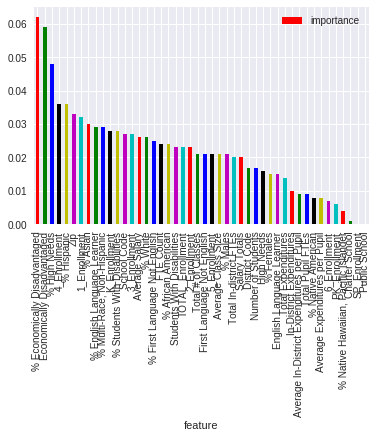

In [85]:
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature ranking
#print("Feature ranking:")

#for f in range(X_train_rf_s.shape[1]):
#    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
    
    
importances_df = pd.DataFrame({'feature':X_rf.columns,'importance':np.round(importances,3)})
importances_df = importances_df.sort_values('importance',ascending=False).set_index('feature')
print(importances_df)
my_colors= 'rgbkymc'
importances_df.plot(kind = 'bar', colors=my_colors)

In [ ]:
df_elem.to_csv('Clean_Elem_data1.csv', index=False)

# df_middle workspace:

In [ ]:
df_middle.head()

In [ ]:
df_middle.shape

In [ ]:
df_middle.isnull().sum()

In [ ]:
df_middle.dropna(thresh=200, axis=1, inplace=True)

In [ ]:
#df_middle.drop(['District_Accountability and Assistance Description', 'Accountability and Assistance Description'], axis=1, inplace=True)
df_middle.drop(['Accountability and Assistance Description'], axis=1, inplace=True)

In [ ]:
def common_nulls(df):
    for col in df.columns:
        if df[col].isnull().sum() == 30:
            df[col].fillna((df[col].mean()), inplace=True)
        elif df[col].isnull().sum() == 9:
            df[col].fillna((df[col].mean()), inplace=True)
        elif df[col].isnull().sum() == 29:
            df[col].fillna((df[col].mean()), inplace=True)
        elif df[col].isnull().sum() == 5:
            df[col].fillna((df[col].mean()), inplace=True)
    return df

In [ ]:
common_nulls(df_middle)

In [ ]:
df_middle['In-District Expenditures'].isnull().sum()

# df_k8 workspace:

In [ ]:
df_k8.head()

# df_high workspace:

In [ ]:
df_high.head()

In [ ]:
df.isna().sum()

In [ ]:
df.to_csv('Mass_Education_data.csv', index=False)

# Junk...

In [ ]:
#df['AP_Tests Taken'] = df['AP_Tests Taken'].str.replace(',', '')
#df['AP_Tests Taken'] = df['AP_Tests Taken'].replace(nan, '')
#df['AP_Tests Taken'].astype(int)